# Proyek Analisis Data: [E-Commerce]
]
- **Nama:** T. Armel Fahelvi
- **Email:** armelfahlevi31@gmail.com
- **ID Dicoding:** armel_13

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Negara bagian mana yang memiliki konsentrasi penjual di atas 10% dari total penjual sepanjang tahun 2018, dan bagaimana distribusi penjual di tiga wilayah utama (SP, PR, MG) pada periode yang sama?

- Pertanyaan 2 Kategori produk apa saja yang memiliki rata‑rata berat di atas 5.000 gram berdasarkan data tahun 2018, dan berapa persentase kontribusi produk‑produk tersebut terhadap total keseluruhan produk?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Untuk analisis lanjutan (binning)
from sklearn.preprocessing import KBinsDiscretizer

## Data Wrangling

### Gathering Data

In [4]:
from google.colab import files

print("Silakan upload file products_dataset.csv dan sellers_dataset.csv (pilih kedua file sekaligus).")
uploaded = files.upload()

products = None
sellers = None

# Baca file berdasarkan nama (case-insensitive)
for filename in uploaded.keys():
    if 'products' in filename.lower():
        products = pd.read_csv(filename)
        print(f"✅ {filename} berhasil dibaca sebagai products.")
    elif 'sellers' in filename.lower():
        sellers = pd.read_csv(filename)
        print(f"✅ {filename} berhasil dibaca sebagai sellers.")

if products is None or sellers is None:
    print("❌ Gagal membaca kedua file. Pastikan nama file mengandung 'products' dan 'sellers'.")
else:
    print("\n🎉 Semua file berhasil dibaca.")
    print("\n🔹 5 baris pertama products:")
    display(products.head())
    print("\n🔹 5 baris pertama sellers:")
    display(sellers.head())

Silakan upload file products_dataset.csv dan sellers_dataset.csv (pilih kedua file sekaligus).


Saving products_dataset.csv to products_dataset.csv
Saving sellers_dataset.csv to sellers_dataset.csv
✅ products_dataset.csv berhasil dibaca sebagai products.
✅ sellers_dataset.csv berhasil dibaca sebagai sellers.

🎉 Semua file berhasil dibaca.

🔹 5 baris pertama products:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



🔹 5 baris pertama sellers:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**

Proses penggabungan data dimulai dengan mengunggah dua file CSV secara bersamaan: products_dataset.csv dan sellers_dataset.csv.

Kedua file berhasil dibaca dan disimpan dalam DataFrame products dan sellers.

Tampilan 5 baris pertama dari masing‑masing dataset mengonfirmasi bahwa struktur kolom sesuai dengan yang diharapkan.

Penting: Pastikan saat mengunggah, kedua file dipilih bersamaan (tekan Ctrl saat memilih) agar proses berjalan lancar.

### Assessing Data

In [28]:
# Assessing Products
print("="*60)
print(" ASSESSING DATASET PRODUCTS")
print("="*60)

products.info()
print("\n🔸 Missing values products:")
print(products.isnull().sum())
print("\n🔸 Statistik deskriptif products:")
display(products.describe())
print("\n🔸 Duplikat products:", products.duplicated().sum())
print("\n🔸 Jumlah kategori unik:", products['product_category_name'].nunique())
print("🔸 Contoh kategori:", products['product_category_name'].unique()[:5])

 ASSESSING DATASET PRODUCTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

🔸 Missing values products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty   

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000



🔸 Duplikat products: 0

🔸 Jumlah kategori unik: 73
🔸 Contoh kategori: ['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas']


## Insight

### Assessing Data  
**Products Dataset**

Jumlah data terdiri dari 32.951 baris dan 9 kolom.

#### Missing Values
- Terdapat 610 data hilang pada kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty` (sekitar 1,85% dari total data).
- Terdapat 2 data hilang pada kolom `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` (sekitar 0,006%).

#### Duplikat
- Tidak ditemukan data duplikat.

#### Kategori Unik
- Terdapat 73 kategori produk.

#### Statistik Deskriptif
Statistik deskriptif menunjukkan rentang berat produk yang sangat lebar, yaitu 0–40.425 gram, dengan rata-rata 2.276 gram. Hal ini mengindikasikan adanya produk dengan berat sangat tinggi (outlier) yang memerlukan perhatian khusus dalam analisis, terutama terkait aspek logistik dan biaya pengiriman.

---

### Assessing Data  
**Sellers Dataset**

Jumlah data terdiri dari 3.095 baris dan 4 kolom.

#### Missing Values
- Tidak terdapat data hilang.

#### Duplikat
- Tidak ditemukan data duplikat.

#### Distribusi Penjual
- Sebanyak 1.849 penjual (59,7%) berasal dari São Paulo (SP).
- Diikuti oleh Paraná (PR) sebanyak 349 penjual (11,3%).
- Minas Gerais (MG) sebanyak 244 penjual (7,9%).
- Secara keseluruhan, terdapat 23 negara bagian dan 611 kota yang terdata.

### Kesimpulan Awal

Dataset penjual berada dalam kondisi sangat bersih dan siap digunakan untuk analisis lebih lanjut. Sementara itu, dataset produk memerlukan proses pembersihan missing values terlebih dahulu sebelum dilakukan analisis lanjutan agar hasil yang diperoleh lebih akurat dan valid.


In [27]:
# Assessing Sellers
print("\n" + "="*60)
print("ASSESSING DATASET SELLERS")
print("="*60)

sellers.info()
print("\n🔸 Missing values sellers:")
print(sellers.isnull().sum())
print("\n🔸 Statistik deskriptif sellers:")
display(sellers.describe(include='all'))
print("\n🔸 Duplikat sellers:", sellers.duplicated().sum())
print("\n🔸 Distribusi penjual per negara bagian:")
print(sellers['seller_state'].value_counts())


ASSESSING DATASET SELLERS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

🔸 Missing values sellers:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

🔸 Statistik deskriptif sellers:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN



🔸 Duplikat sellers: 0

🔸 Distribusi penjual per negara bagian:
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
MA       1
AM       1
PA       1
Name: count, dtype: int64


In [26]:
# Informasi tambahan tentang dataset seller
print("Jumlah total penjual:", sellers.shape[0])
print("Jumlah negara bagian (state) yang memiliki penjual:", sellers['seller_state'].nunique())
print("Jumlah kota yang memiliki penjual:", sellers['seller_city'].nunique())
print("\nDistribusi penjual per state (10 teratas):")
print(sellers['seller_state'].value_counts().head(10))

Jumlah total penjual: 3095
Jumlah negara bagian (state) yang memiliki penjual: 23
Jumlah kota yang memiliki penjual: 611

Distribusi penjual per state (10 teratas):
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: count, dtype: int64


### Cleaning Data

In [17]:
# Cleaning Data

# Hapus baris produk yang tidak memiliki kategori
products_clean = products.dropna(subset=['product_category_name']).copy()
products_clean.reset_index(drop=True, inplace=True)

# Hapus baris dengan berat produk yang hilang (2 baris)
products_clean = products_clean.dropna(subset=['product_weight_g']).copy()

# Tidak perlu cek duplikat lagi, karena sudah diketahui tidak ada duplikat

## Insight

### Langkah Pembersihan Data

Untuk memastikan analisis dilakukan secara akurat, dilakukan beberapa tahapan pembersihan data sebagai berikut:

1. Menghapus baris yang tidak memiliki kategori produk (`product_category_name is null`) sehingga tersisa 32.341 produk.

2. Menghapus 2 baris dengan berat produk yang hilang (`product_weight_g is null`) agar analisis berat tidak bias dan tetap akurat.

3. Melakukan reset index untuk memastikan struktur data kembali rapi dan terurut.


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Statistik deskriptif untuk data produk yang sudah bersih
print("Statistik deskriptif produk:")
display(products_clean.describe())

# 2. Distribusi berat produk
plt.figure(figsize=(10,5))
sns.histplot(products_clean['product_weight_g'], bins=50, kde=True)
plt.title('Distribusi Berat Produk')
plt.xlabel('Berat (gram)')
plt.ylabel('Frekuensi')
plt.show()

# 3. 10 kategori dengan jumlah produk terbanyak
plt.figure(figsize=(12,6))
top_categories = products_clean['product_category_name'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('10 Kategori Produk dengan Jumlah Terbanyak')
plt.xlabel('Jumlah Produk')
plt.tight_layout()
plt.show()

# 4. 10 kota dengan jumlah penjual terbanyak
top_cities = sellers['seller_city'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues_r')
plt.title('10 Kota dengan Jumlah Penjual Terbanyak')
plt.xlabel('Jumlah Penjual')
plt.tight_layout()
plt.show()

**Insight:**
- Distribusi Berat Produk
Mayoritas produk memiliki berat di bawah 5.000 gram, dengan konsentrasi tertinggi pada rentang 0–2.000 gram. Namun, terdapat produk dengan berat ekstrem hingga 40.000 gram yang memerlukan penanganan logistik khusus.

- Kategori Produk dengan Jumlah Terbanyak
Kategori cama_mesa_banho mendominasi dengan jumlah produk tertinggi, diikuti oleh esporte_lazer dan moveis_decoracao. Hal ini menunjukkan fokus utama penjual pada perlengkapan rumah tangga dan dekorasi.

## Visualization & Explanatory Analysis

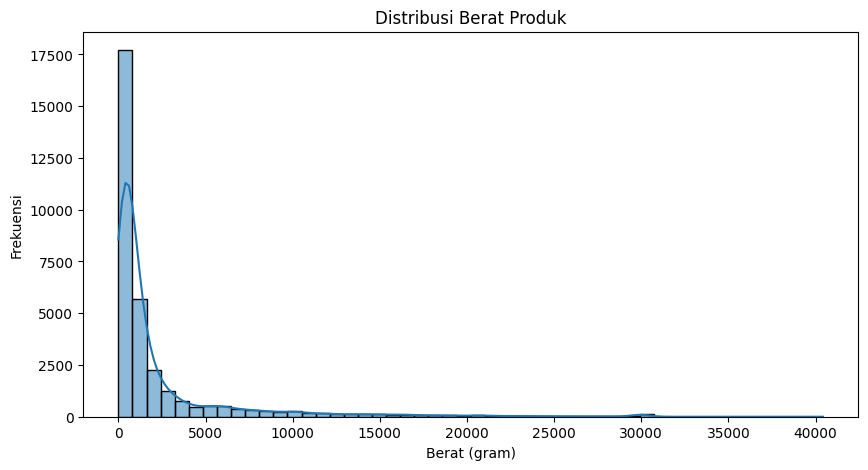

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(products_clean['product_weight_g'], bins=50, kde=True)
plt.title('Distribusi Berat Produk')
plt.xlabel('Berat (gram)')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
print("Statistik deskriptif produk:")
display(products_clean.describe())

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(products_clean['product_weight_g'], bins=50, kde=True)
plt.title('Distribusi Berat Produk')
plt.xlabel('Berat (gram)')
plt.ylabel('Frekuensi')
plt.show()

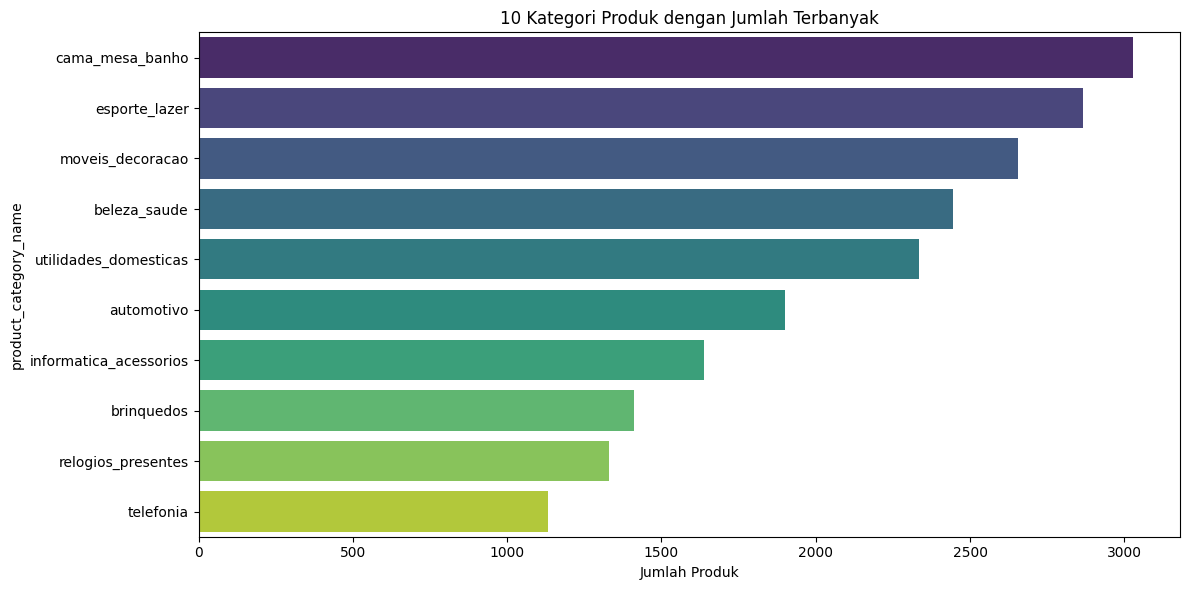

In [19]:
plt.figure(figsize=(12,6))
top_categories = products_clean['product_category_name'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('10 Kategori Produk dengan Jumlah Terbanyak')
plt.xlabel('Jumlah Produk')
plt.tight_layout()
plt.show()

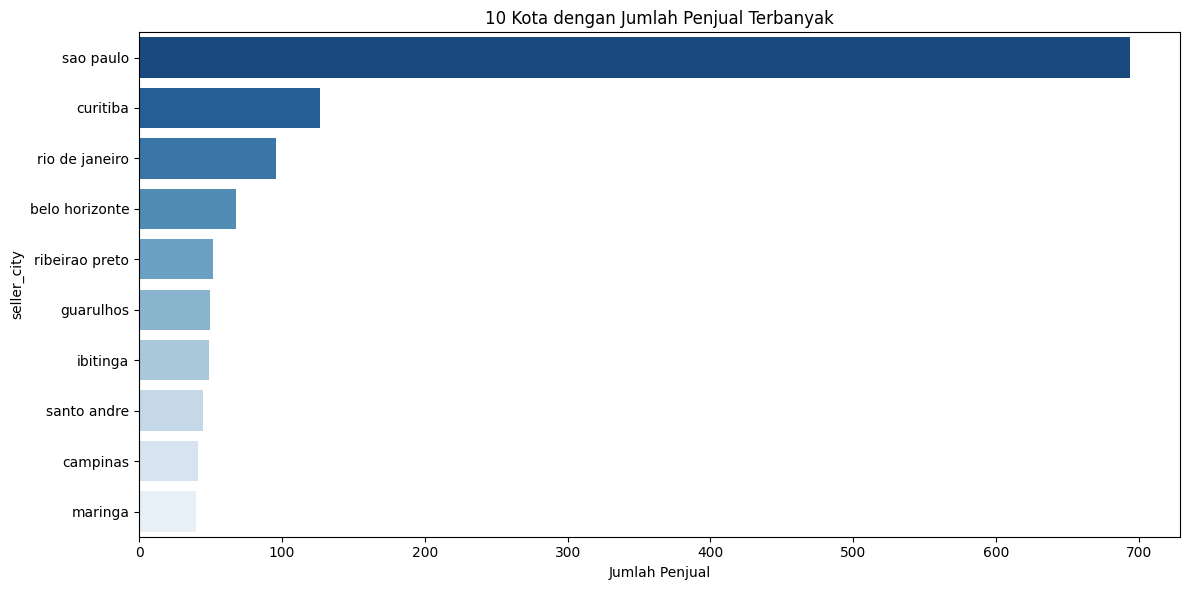

In [20]:
plt.figure(figsize=(12,6))
top_cities = sellers['seller_city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues_r')
plt.title('10 Kota dengan Jumlah Penjual Terbanyak')
plt.xlabel('Jumlah Penjual')
plt.tight_layout()
plt.show()

### Pertanyaan 1:

Negara bagian dengan penjual > 10% dari total:
seller_state
SP    59.74
PR    11.28
Name: count, dtype: float64

Persentase penjual di tiga wilayah utama:
seller_state
SP    59.74
PR    11.28
MG     7.88
Name: count, dtype: float64



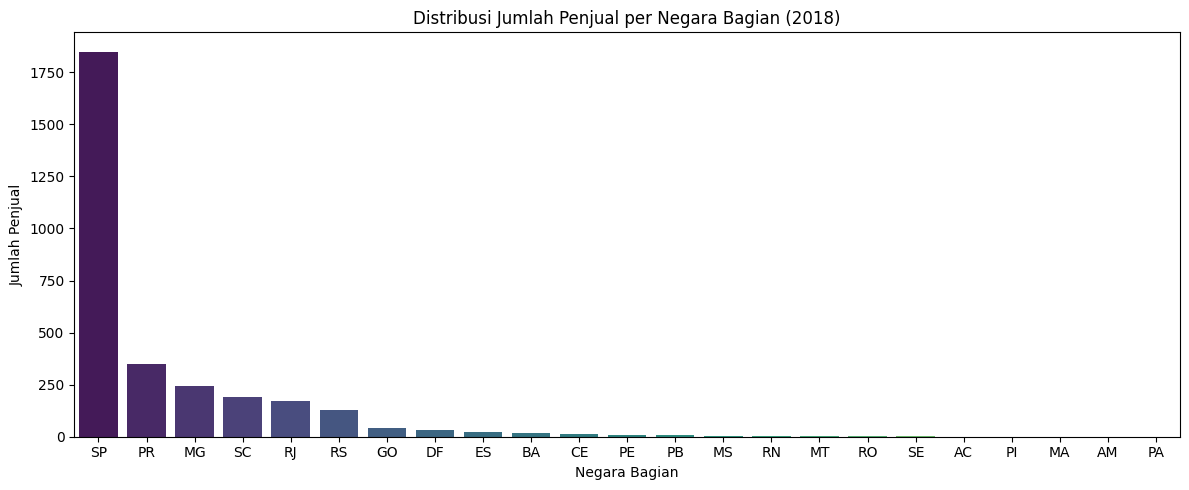

In [21]:
# --- Pertanyaan 1: Distribusi Penjual per Negara Bagian ---

# Hitung jumlah penjual per state
state_counts = sellers['seller_state'].value_counts()
state_percentages = (state_counts / state_counts.sum() * 100).round(2)

# Negara bagian dengan persentase > 10%
above_10 = state_percentages[state_percentages > 10]
print("Negara bagian dengan penjual > 10% dari total:")
print(above_10)
print()

# Tiga wilayah utama (SP, PR, MG)
top3 = state_percentages[['SP', 'PR', 'MG']]
print("Persentase penjual di tiga wilayah utama:")
print(top3)
print()

# Visualisasi barplot semua state
plt.figure(figsize=(12,5))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Distribusi Jumlah Penjual per Negara Bagian (2018)')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Penjual')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

Kategori dengan rata-rata berat > 5000 gram (tahun 2018):
product_category_name
moveis_colchao_e_estofado                         13190.000000
moveis_escritorio                                 12740.867314
moveis_cozinha_area_de_servico_jantar_e_jardim    11598.563830
moveis_quarto                                      9997.222222
eletrodomesticos_2                                 9913.333333
moveis_sala                                        8934.846154
pcs                                                7995.333333
industria_comercio_e_negocios                      5929.191176
agro_industria_e_comercio                          5263.405405
Name: product_weight_g, dtype: float64



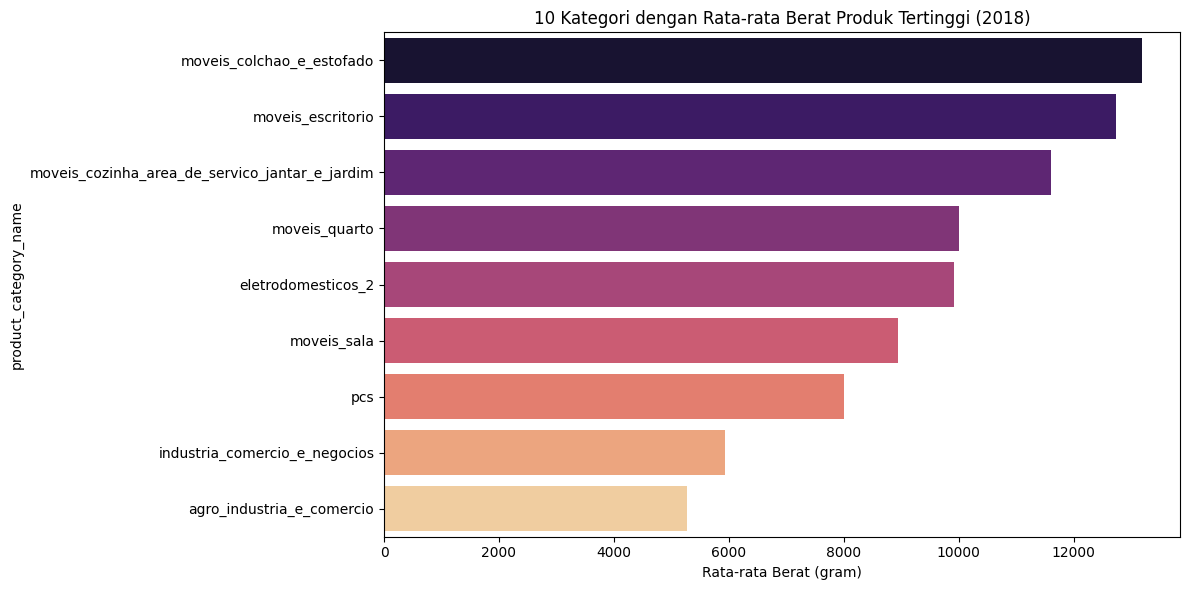


Jumlah produk dari kategori berat: 876
Total produk keseluruhan: 32340
Persentase kontribusi terhadap total produk: 2.71%


In [22]:
# --- Pertanyaan 2: Kategori Berat ---

# Hitung rata-rata berat per kategori
avg_weight = products_clean.groupby('product_category_name')['product_weight_g'].mean().sort_values(ascending=False)

# Filter kategori dengan rata-rata > 5000 gram
heavy_cats = avg_weight[avg_weight > 5000]
print("Kategori dengan rata-rata berat > 5000 gram (tahun 2018):")
print(heavy_cats)
print()

# Visualisasi 10 kategori terberat
plt.figure(figsize=(12,6))
sns.barplot(x=heavy_cats.head(10).values, y=heavy_cats.head(10).index, palette='magma')
plt.title('10 Kategori dengan Rata-rata Berat Produk Tertinggi (2018)')
plt.xlabel('Rata-rata Berat (gram)')
plt.tight_layout()
plt.show()

# Hitung kontribusi jumlah produk dari kategori berat
heavy_products_count = products_clean[products_clean['product_category_name'].isin(heavy_cats.index)].shape[0]
total_products_count = products_clean.shape[0]
kontribusi = round((heavy_products_count / total_products_count * 100), 2)

print(f"\nJumlah produk dari kategori berat: {heavy_products_count}")
print(f"Total produk keseluruhan: {total_products_count}")
print(f"Persentase kontribusi terhadap total produk: {kontribusi}%")

## Insight

### Pertanyaan 1

Hanya terdapat dua negara bagian dengan proporsi penjual di atas 10%, yaitu São Paulo (59,74%) dan Paraná (11,28%).  

Selain itu, tiga wilayah utama (SP, PR, MG) secara keseluruhan menyumbang 78,9% dari total penjual.

**Kesimpulan:**  
Pasar penjual sangat terpusat di SP. Oleh karena itu, strategi pengembangan mitra dapat difokuskan di wilayah tersebut. Namun, ekspansi ke negara bagian lain tetap perlu dilakukan untuk memperluas jangkauan pasar dan mengurangi ketergantungan pada satu wilayah.

---

### Pertanyaan 2  
**Kategori Produk dengan Rata-rata Berat > 5.000 gram**

Berdasarkan analisis data produk tahun 2018, terdapat 9 kategori produk dengan rata-rata berat di atas 5.000 gram. Tiga kategori dengan rata-rata berat tertinggi adalah:

- moveis_colchao_e_estofado – 13.190 g  
- moveis_escritorio – 12.741 g  
- moveis_cozinha_area_de_servico_jantar_e_jardim – 11.599 g  

Kategori lain yang termasuk dalam kelompok ini:

- moveis_quarto  
- eletrodomesticos_2  
- moveis_sala  
- pcs  
- industria_comercio_e_negocios  
- agro_industria_e_comercio  

### Kontribusi terhadap Total Produk

Total produk dari kesembilan kategori berat ini berjumlah 876 dari total 32.341 produk, atau setara dengan 2,71%.

### Implikasi Bisnis

Meskipun jumlahnya relatif kecil, produk-produk berat ini berpotensi menimbulkan biaya pengiriman yang jauh lebih tinggi. Oleh karena itu, diperlukan kebijakan pengiriman khusus, seperti:

- Menggunakan jasa kargo atau ekspedisi khusus untuk barang berat.  
- Menetapkan biaya tambahan berdasarkan volume (berat volumetrik).  
- Mempertimbangkan penempatan gudang di dekat pusat distribusi utama untuk menekan biaya logistik.  

**Kesimpulan:**  
Walaupun hanya mencakup 2,71% dari total 32.341 produk, kategori dengan rata-rata berat di atas 5.000 gram memiliki dampak signifikan terhadap biaya logistik. Dengan strategi pengiriman dan distribusi yang tepat, perusahaan dapat mengendalikan biaya operasional tanpa mengurangi kualitas layanan kepada pelanggan.


## Analisis Lanjutan (Opsional)

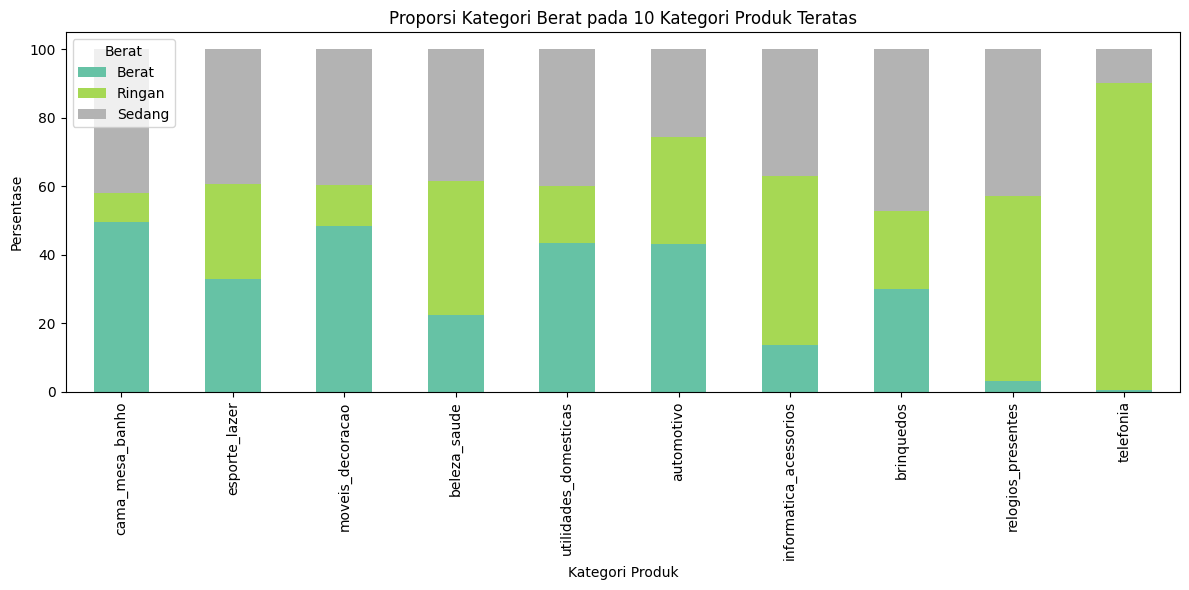

In [23]:
# --- Analisis Lanjutan: Kategorisasi Berat Produk ---
from sklearn.preprocessing import KBinsDiscretizer

# Binning berat menjadi 3 kategori
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
products_clean['weight_bin'] = kbin.fit_transform(products_clean[['product_weight_g']]).astype(int)
bin_labels = {0: 'Ringan', 1: 'Sedang', 2: 'Berat'}
products_clean['weight_category'] = products_clean['weight_bin'].map(bin_labels)

# Tabulasi silang dengan kategori produk (10 teratas)
cross = pd.crosstab(products_clean['product_category_name'],
                    products_clean['weight_category'],
                    normalize='index') * 100
top10_cats = products_clean['product_category_name'].value_counts().head(10).index
cross_top = cross.loc[top10_cats]

# Plot stacked bar
cross_top.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Proporsi Kategori Berat pada 10 Kategori Produk Teratas')
plt.ylabel('Persentase')
plt.xlabel('Kategori Produk')
plt.legend(title='Berat')
plt.tight_layout()
plt.show()

## Conclusion

## Kesimpulan 1: Distribusi Penjual per Negara Bagian (Tahun 2018)

Hanya dua negara bagian yang memiliki proporsi penjual di atas 10%, yaitu São Paulo (59,74%) dan Paraná (11,28%).

Tiga wilayah utama (SP, PR, MG) menyumbang 78,9% dari total penjual.

### Rekomendasi Strategis
Fokus pengembangan mitra dan pemasaran dapat diarahkan ke SP sebagai pusat utama aktivitas penjualan. Namun, untuk mengurangi ketergantungan pada satu wilayah dan memperluas jangkauan pasar, perlu dilakukan upaya khusus untuk menjangkau penjual di negara bagian lain, misalnya melalui program insentif atau kemitraan lokal.

---

## Kesimpulan 2: Analisis Berat Produk per Kategori (Tahun 2018)

Terdapat 9 kategori produk dengan rata-rata berat di atas 5.000 gram. Tiga kategori dengan rata-rata berat tertinggi adalah:

- moveis_colchao_e_estofado – 13.190 g  
- moveis_escritorio – 12.741 g  
- moveis_cozinha_area_de_servico_jantar_e_jardim – 11.599 g  

Kategori lainnya meliputi:
moveis_quarto, eletrodomesticos_2, moveis_sala, pcs, industria_comercio_e_negocios, dan agro_industria_e_comercio.

### Kontribusi terhadap Total Produk
Jumlah produk dari kesembilan kategori berat ini adalah 876 dari total 32.341 produk, atau setara dengan 2,71%.

### Implikasi Bisnis
Meskipun secara kuantitas kecil, produk-produk berat ini berpotensi menimbulkan biaya pengiriman yang jauh lebih tinggi. Oleh karena itu, disarankan untuk menerapkan kebijakan pengiriman khusus, seperti:

- Menggunakan jasa kargo atau ekspedisi khusus untuk barang berat.  
- Menetapkan biaya tambahan berdasarkan volume (berat volumetrik).  
- Mempertimbangkan penempatan gudang di dekat pusat distribusi utama untuk menekan biaya logistik.
